## ${\textbf{Libraries}}$

In [117]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

# dendrogram is a tree-like, hirarchical representation of points 
    # it is what we normally use for hirarchical solutions
    # Linkage is a specific employed method 
from scipy.cluster.hierarchy import dendrogram, linkage

# K Means Clustering 
from sklearn.cluster import KMeans

# importing PCA
from sklearn.decomposition import PCA

## ${\textbf{Import Data}}$

In [118]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [119]:
# .head is to display rows of the DF 

df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [120]:
# .describe is to have all the count mean and stuff to come out
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## ${\textbf{Correlation Estimate}}$

In [121]:
# .corr() is to read the chart from hortizontal and vertical, with 1 being the most correlated and -1 being the least 
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


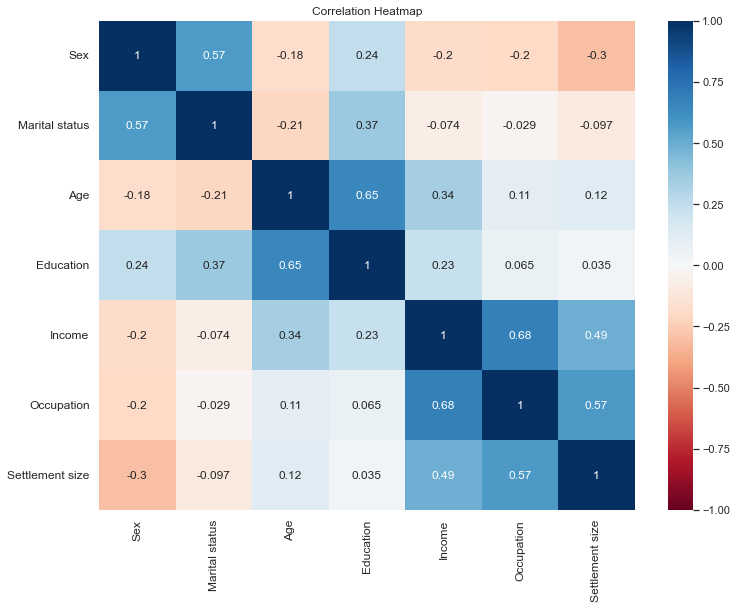

In [122]:
# 12 is wide, 9 is height 
plt.figure(figsize = (12, 9))

# sns.heatmap is standard so you just include the file name beside
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               # vmin and vmax should be defined, cuz if you dont, then it will be weird 
               vmin = -1, 
               vmax = 1)

# setting the x and y axis and their rotation 
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
# setting the title 
plt.title('Correlation Heatmap')
plt.show()

## ${\textbf{Visualize Raw Data}}$

Text(0.5, 1.0, 'Visualization of raw data')

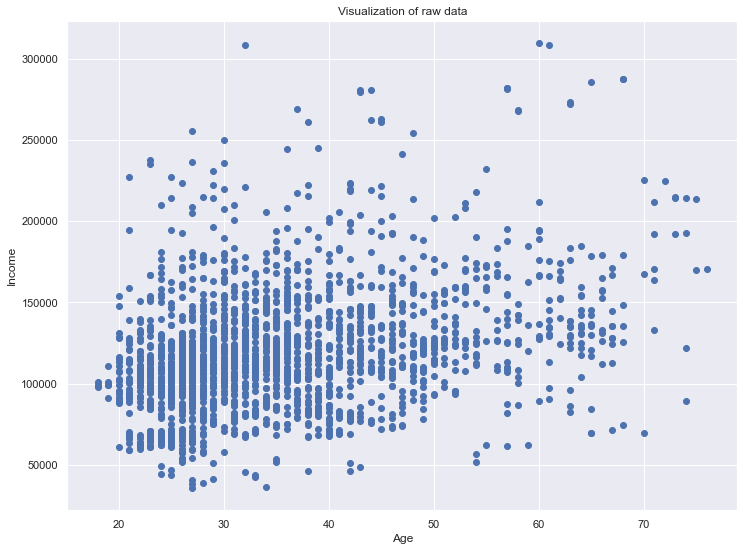

In [123]:
plt.figure(figsize = (12, 9))
# we only want to show col 2 and 4 because that is the age and income 
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## ${\textbf{Standardization}}$

In [124]:
# we want to standardize this because we wanna compare everything relatively 

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## ${\textbf{Hierarchical Clustering}}$

In [125]:
# this is to show the hierarchical and use the linkage method to do it 
hier_clust = linkage(segmentation_std, method = 'ward')


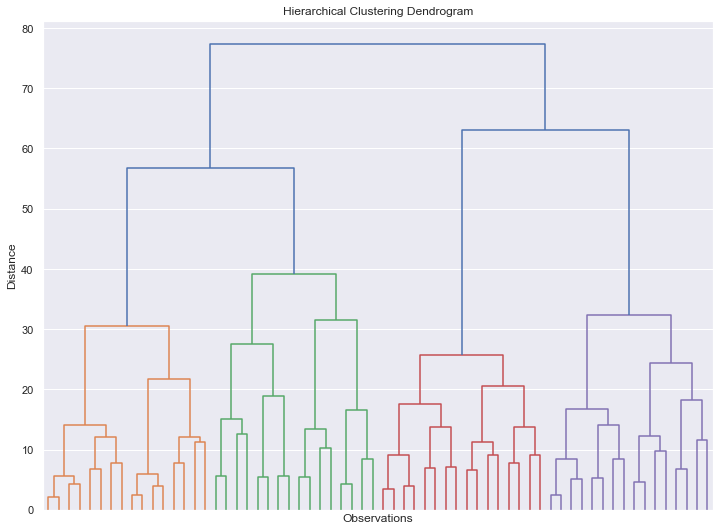

In [126]:
# we need to find a horizontal line on the dendrogram on which to cut 
    # so the rule of thumb is to find the longest vertical line unintercepted by a horizontal line from the dendrogram
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

### So usually, hierarchical clustering is really slow, the only advantage is that it tells us how many clusters are there. 
therefore we would usually use this clustering to determine clusters and then move on to flat clustering for segmentation 

## K-Means Clustering 

In [127]:
# initialize the within sum of square (WCSS)
wcss = []
for i in range (1,11):
    # k-means++ is an initialization algorithm that finds the best cluster seeds 
    # random_state is to ensure that we will get the initial centroid if we run the code multiple times
    # 42 is a random number
        # but not sure what does the i stand for though
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # fitting the kmeans data onto our dataset 
    kmeans.fit(segmentation_std)
    # with each iteration, adding the value to the wcss.array 
    # the array is stored in the kmeans.inertia
    wcss.append(kmeans.inertia_)

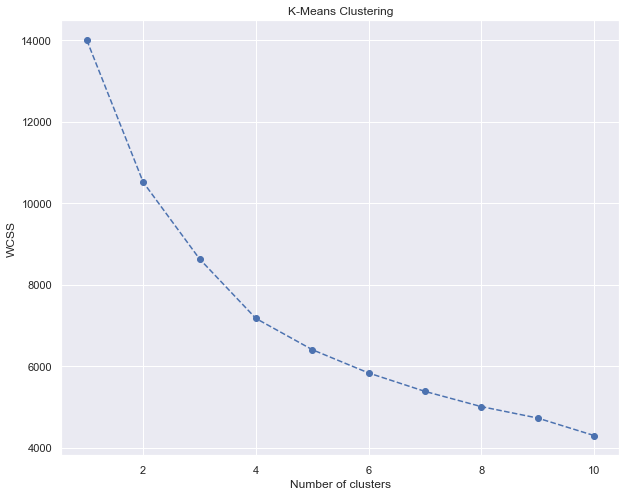

In [128]:
plt.figure(figsize = (10,8))
# range(1,11) is the x axis 
# wcss is the y axis
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('K-Means Clustering')
plt.show()

### Notes: 
when reading the above chart, you have to be careful and can read up more on the elbow method 

In [129]:
kmeans = KMeans(n_clusters= 4, init = 'k-means++', random_state=42 )


In [130]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

### Results 

In [131]:
# making a copy of our segmentation dataframe 
df_segm_kmeans = df_segmentation.copy()

# adding a new column named segment K-means 
# we will use this col to store all the predictive cluster data 
# the prediction can be extracted from the label attribute 
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [132]:
# groupby segment k means and then find the mean value 
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [133]:
# we want to group by count instead of mean 
# we also want to add a new col > df_segm_analysis['N Obs']
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

# N Obs, the Obs has to be big letter O, but im not sure why if its small letter it wont work 
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum() 
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [134]:
# this is how you rename the columns in the dataframe

df_segm_analysis.rename({
    0:'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [135]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({
    0:'well-off',
    1: 'fewer-opportunities',
    2: 'standard',
    3: 'career focused'
})

/Users/sethchong/Dev/data_sci/venv_1/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


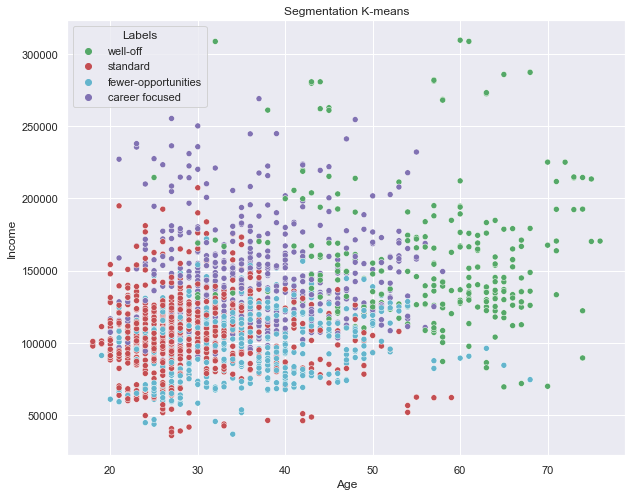

In [136]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette=['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

## We can tell that from the above chart, the clustering worked but its not very useful, but nonetheless this is still very useful 

---
so we are going to try and use Principal Component Analysis (PCA) to try it on K-means clustering 

### Principal Component Analysis (PCA)

In [137]:
# let the pca variable = an instance of the PCA class
pca = PCA()

In [138]:
pca.fit(segmentation_std)

PCA()

In [141]:
# to find out how many components there are on the PCA
# this will always sum to 1, so you can take a look
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])